## Example 2 - Multiple Minima vs Initial Guess and Advanced Functions
$$g(x)=x^4 - 4x^2 + 5$$

In [45]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# Make some data
x_2 = np.linspace(-2,2,1000)

def g(x):
    return (x**4) - (4*(x**2)) + 5

def dg(x):
    return (4*(x**3)) - (8*x)

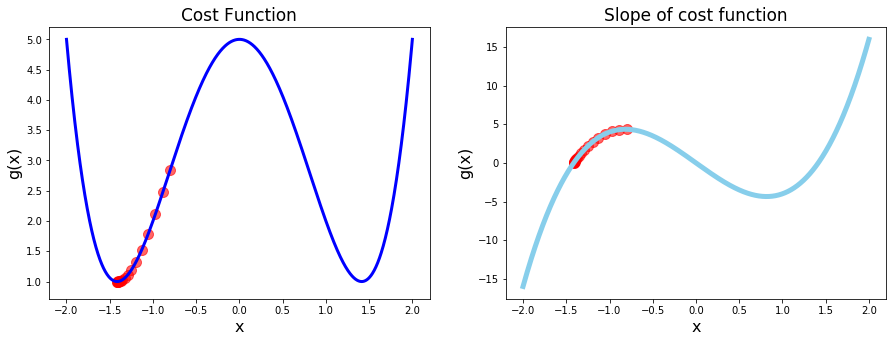

In [33]:
plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title("Slope of cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)
plt.scatter(list_x, np.array(deriv_list), color="red", s=100, alpha=0.6)

plt.show()



## Gradient Descent as a Python Function

In [19]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=.001):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    for n in range(1000):
        previous_x = new_x
        new_x = previous_x - (derivative_func(previous_x) * multiplier)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        diff = abs(new_x - previous_x)
        if (diff < precision):
            break
    return new_x, x_list, slope_list    
    

In [32]:
local_min, list_x, deriv_list = gradient_descent(dg, -0.8)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))


Local min occurs at: -1.4121125728186934
Number of steps: 19


In [28]:
local_min, list_x, deriv_list = gradient_descent(dg, -0.5, 0.01, .0001)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))


Local min occurs at: -1.4137636556157256
Number of steps: 56


## Example 3 - Divergence, Overflow and Python Turples
$$ h(x) = x^5 - 2x^4 + 2 $$

In [35]:
# Make data
x_3 = np.linspace(-2.5, 2.5, 1000)

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3




In [50]:
local_min, list_x, deriv_list = gradient_descent(dh, 0.2)
print("Local min occurs at:", local_min)
print("Number of steps:", len(list_x))

# If we take the initial value as -0.2 then the overflow occur because our graph approaces -inf.


Local min occurs at: 1.5989534547394717
Number of steps: 117


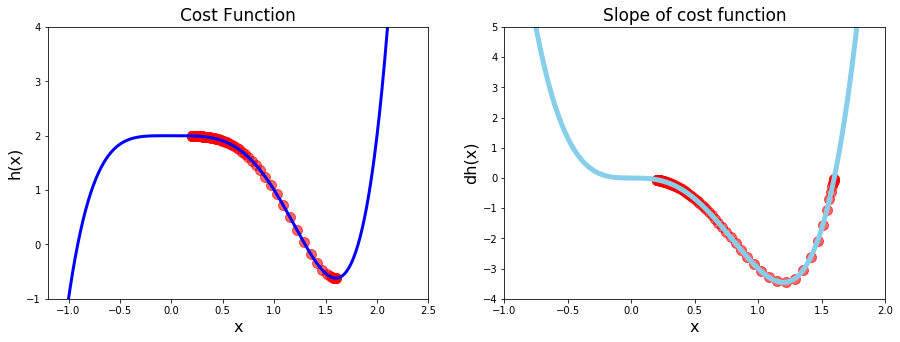

Local min occurs at 1.5989534547394717
Cost at this minimum is: -0.6214287992331258
Number of steps:  117


In [48]:
plt.figure(figsize=[15, 5])

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=17)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.xlabel("x", fontsize=16)
plt.ylabel("h(x)", fontsize=16)
plt.plot(x_3, h(x_3), color="blue", linewidth=3)
plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title("Slope of cost function", fontsize=17)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.xlabel("x", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)
plt.plot(x_3, dh(x_3), color="skyblue", linewidth=5)
plt.scatter(list_x, np.array(deriv_list), color="red", s=100, alpha=0.6)

plt.show()
print("Local min occurs at", local_min)
print("Cost at this minimum is:", h(local_min))
print("Number of steps: ", len(list_x))


In [54]:
import sys
#help(sys)
#sys.version
#sys.float_info.max
#This is to check that if we apply gradient descent on the above graph for a value of x <= -.2 we will get an overflow in about
# 72 iteration of the algorithm.



1.7976931348623157e+308